In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionV3

In [2]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ardraaa","key":"4c57298fc6e8c2491119821134815343"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors
100% 740M/743M [00:20<00:00, 42.4MB/s]
100% 743M/743M [00:20<00:00, 37.8MB/s]


In [5]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [6]:
valid_dir = '/content/New Plant Diseases Dataset(Augmented)/valid'# Paths to dataset directories
train_dir = '/content/New Plant Diseases Dataset(Augmented)/train'

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [9]:
# Load InceptionV3 with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [11]:

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
checkpoint = ModelCheckpoint('best_inceptionv3_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


574/574 ━━━━━━━━━━━━━━━━━━━━ 271s 436ms/step - accuracy: 0.5631 - loss: 1.3163 - val_accuracy: 0.7064 - val_loss: 0.8238
Epoch 2/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 239s 413ms/step - accuracy: 0.7505 - loss: 0.7212 - val_accuracy: 0.7210 - val_loss: 0.7796
Epoch 3/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 260s 409ms/step - accuracy: 0.7809 - loss: 0.6329 - val_accuracy: 0.7930 - val_loss: 0.5906
Epoch 4/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 238s 411ms/step - accuracy: 0.7971 - loss: 0.5753 - val_accuracy: 0.7858 - val_loss: 0.6044
Epoch 5/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 236s 408ms/step - accuracy: 0.8124 - loss: 0.5414 - val_accuracy: 0.8092 - val_loss: 0.5262
Epoch 6/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 237s 409ms/step - accuracy: 0.8194 - loss: 0.5216 - val_accuracy: 0.8081 - val_loss: 0.5252
Epoch 7/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 261s 407ms/step - accuracy: 0.8245 - loss: 0.5032 - val_accuracy: 0.8122 - val_loss: 0.5163
Epoch 8/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 263s 407ms/step - accuracy: 0.8338 - loss: 0.47

In [14]:
model.save('Untitled0.h5')

In [15]:
import pickle
with open('traininghistory.pkl','wb') as f:
  pickle.dump(history.history,f)

In [16]:
loss,accuracy=model.evaluate(valid_generator)
print(f"validation accuracy:{accuracy*100:2f}%")
print(f"validation loss:{loss:4f}")

144/144 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8805 - loss: 0.3646
validation accuracy:87.568158%
validation loss:0.356867


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
from tensorflow.keras.models import load_model

# Load the model
model1 = load_model('/content/Untitled0.h5')

Found 4585 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step


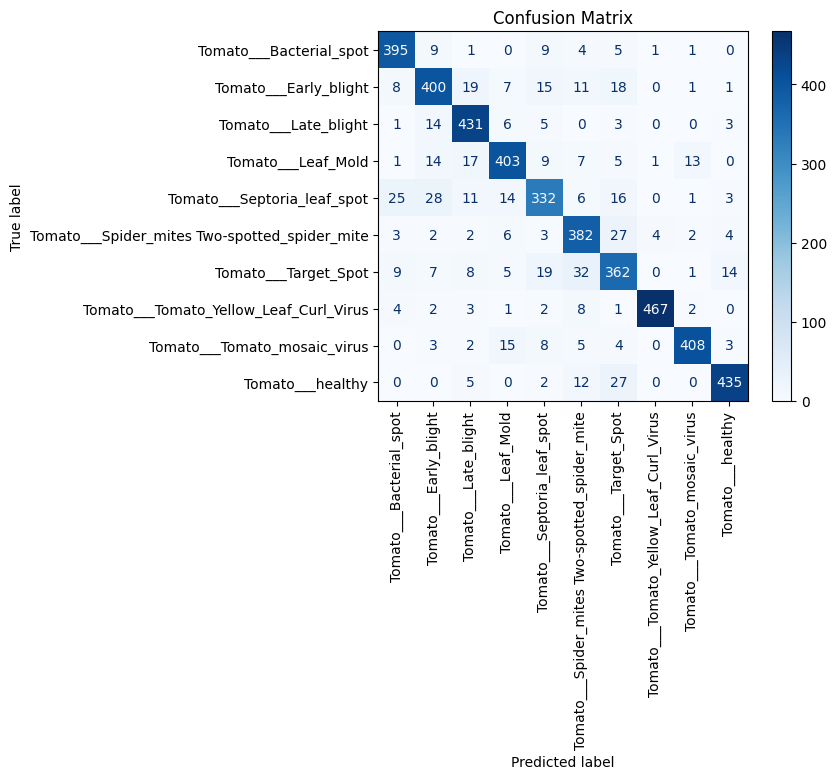

In [19]:
datagen = ImageDataGenerator(rescale=1.0 / 255)

valid_data = datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),  # Input size of your model
    batch_size=32,
    class_mode='categorical',  # Adjust this if using binary classification
    shuffle=False  # Keep the order of images for consistency
)

# 3. Get the true labels and predicted labels
true_labels = valid_data.classes  # True labels (ground truth)
class_labels = list(valid_data.class_indices.keys())  # Get the class labels

# 4. Make predictions on the validation data
predictions = model.predict(valid_data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# 5. Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# 6. Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

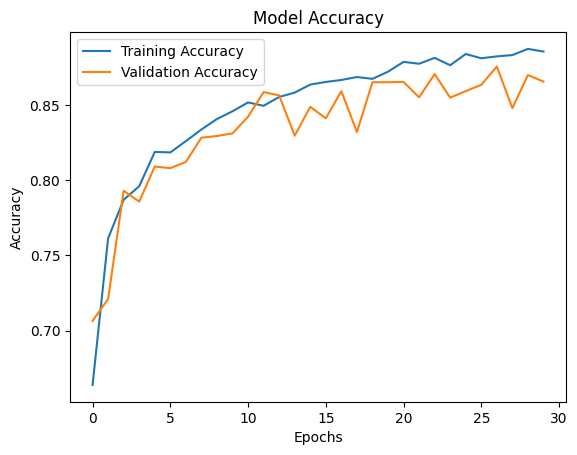

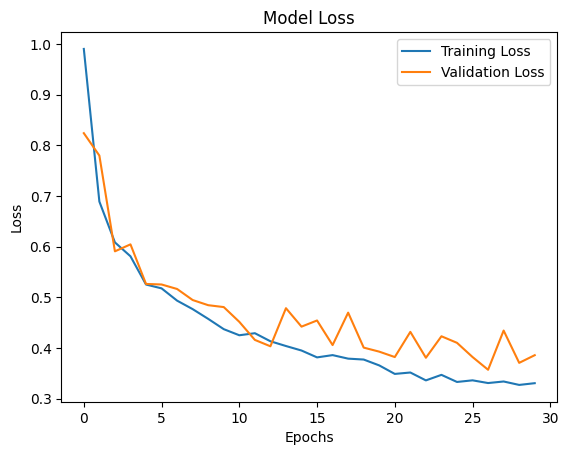

In [21]:
import matplotlib.pyplot as plt
import pickle

# Load training history (if saved as a pickle file during training)
with open('traininghistory.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()